In [1]:
import imageio
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

# 该神经网络有三层，输入层、隐藏层和输出层
class neuralNetwork:
    
    
    # 初始化神经网络
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 设置每层节点数量
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 权重形式
        # w11 w21
        # w21 w22 etc，故对于W_input_hidden来说列数为inodes,行数为hnodes
        # self.wih = numpy.random.rand(self.hnodes, self.inodes) - 0.5
        # self.who = numpy.random.rand(self.onodes, self.hnodes) - 0.5

        # 采用正太分布优化权重取值,标准差为1/(传入连接数目的0.5次方)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # 学习率
        self.lr = learningrate
        
        # 激活函数
        self.activation_function = lambda x: scipy.special.expit(x)       
        pass

    
    # 根据正确的输入值和目标值训练神经网络，找到更合适的权重
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T # 列表转化为二维数组
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        # errors_hidden = W_hidden_output.T error_output
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))       
        pass

    
    # 根据输入求输出
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T        
        # X_hidden = W_input_hidden I
        hidden_inputs = numpy.dot(self.wih, inputs)
        # O_hidden = sigmoid(X_hidden)
        hidden_outputs = self.activation_function(hidden_inputs)        
        # 输出层计算
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [2]:
# 训练神经网络
input_nodes = 784 # 数字的像素为28x28,故输入节点为784个
hidden_nodes = 200
output_nodes = 10 # 表示0~9，10个数字
learning_rate = 0.1
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

training_data_file = open("my/mnist_train_100.csv", 'r') #训练数据
training_data_list = training_data_file.readlines()
training_data_file.close()
epochs = 10

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 #  输入数据要在[0.01,1]之内
        targets = numpy.zeros(output_nodes) + 0.01  # 初始10个为0.01的列表
        targets[int(all_values[0])] = 0.99  # 目标值为0.99
        n.train(inputs, targets) # 调用神经网络进行训练
        pass
    pass

test with our own image 

min =  0.01
max =  1.0
[[0.03860549]
 [0.04113806]
 [0.04438304]
 [0.07634425]
 [0.15891489]
 [0.05197494]
 [0.20613737]
 [0.1324943 ]
 [0.01257554]
 [0.04677374]]
network says  6


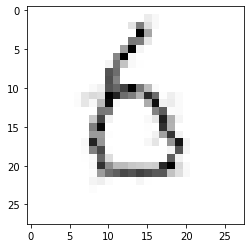

In [3]:
# 测试神经网络

img_array = imageio.imread('my/2828_my_own_6.png', as_gray=True)
img_data  = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)
print (outputs)
 # 找到输出数组中最大值的索引，其对应的就是实际识别的数字
label = numpy.argmax(outputs)
print("network says ", label)
